In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['CUDA_LAUNCH_BLOCKING'] = "0"

In [2]:
from config.base import Grid, Config
from evaluation.Experiments import runExperiment
from evaluation.Kvariants_Eval import KVariantEval

In [3]:
model_configurations = Grid('/media/usr/SSD/jitae/Thesis/Neural transformation/config_files/config_lg_ntl_plus_soft_v2.yml','lg_data_ntl_plus_v2')

In [4]:
model_configuration = Config(**model_configurations[0])

In [5]:
method_list= ["loe_soft","loe_hard"]

In [6]:
proposed_method_list = ["loe_soft_semi","loe_hard_semi"]

In [7]:
contamination_ratio = [0.01]

In [8]:
true_anoamaly_ratio = [0.1]

In [9]:
or_true_anoamaly_ratio = [0]

In [10]:
from itertools import product

items = [proposed_method_list, contamination_ratio,true_anoamaly_ratio]
proposed_case=list(product(*items))
items = [method_list, contamination_ratio,or_true_anoamaly_ratio]
or_case=list(product(*items))



In [11]:
len(proposed_case),len(or_case)

(2, 2)

In [12]:
all_case=proposed_case + or_case

In [13]:
all_case

[('loe_soft_semi', 0.01, 0.1),
 ('loe_hard_semi', 0.01, 0.1),
 ('loe_soft', 0.01, 0),
 ('loe_hard', 0.01, 0)]

In [14]:
all_case[0]

('loe_soft_semi', 0.01, 0.1)

In [15]:
## As you can see the true anomaly ratio will be not woriking due to lg_data_ntl_plus in data loader
## All of labled anomalies are utlized for training anomaly detector!
## If you are not familiar w/ this concept, please see the below code

In [16]:
# def lg_data_ntl_plus_v2(contamination_rate,true_anomaly_rate):
#     # 제품의 csv 파일 입력 부분
#     #data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA452.csv",index_col=0) # done
#     #data = pd.read_csv("DATA/lg/CalibrationSample_M871GBB551.csv",index_col=0) # done--
#     data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA451.csv",index_col=0) # done 
#     #data = pd.read_csv("DATA/lg/CalibrationSample_W822AAA152.csv",index_col=0) # done
#     #data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA451.csv",index_col=0)# done
#     #data = pd.read_csv("DATA/lg/CalibrationSample_M872AAA031.csv",index_col=0)# done-- 
    
    
#     data = data.reset_index()
#     # 1. len_filter 적용
#     # data_len = data[data['len_filter']==1].reset_index(drop=True)
#     # 2. RESULT 적용
#     #  data_len_ok = data_len[data_len['RESULT']=='OK']
#     #  data_len_ok = data_len_ok.reset_index(drop=True) # reset index안해주면 len_barcode_seq가 안됨
#     # 최종 사용할 data는 data_len_ok 임

#     # LG 측에서 제공한 실제 고장 BARCODE_hash 입력
#     #barcode_anomaly = ['gAAAAABhwo7BC3xrJ17V8mkX4-3sJ1S9xu0ltGqP8-ApcNxRD2hG8Hsc6Aa923ERs-sLsM4M2U68fZSkjTW5lTxWnhOiw3IdSwC-TkcbtKVveBNN6sUqL74='] # done
#     #barcode_anomaly = ['gAAAAABhwo7CLznfZitvOF1Zt2S9DefyDvFi2hUbuYhtzKM-5yQcj-fsq-SK-s_9lF5VObM7hpSnkwmA20slXnCplQEfoDLX-wl9l0wkHCgZYXgGNr9ItfQ='] #done
#     barcode_anomaly = ['gAAAAABhwo7C4eAPjtOdXWTW9tE84sjGYNtCGTEiK4gIaoSd_yU4ZPVSzL9B1nkHpSk0Mz1-6ONDExbPlqPRy3p6oimujuSGvYFYvv7KFNSAFe4NQDj8wVE='] # done
#     #barcode_anomaly = ['gAAAAABib2XPayWAPUSOLHyWifIKhZHHszb4nNckJ86bAMLA3bpJzL-2JkwQrM_lsp-ic-UqC6GG2q1rh3m7ao4HwP2RnGtLaHZI79xRiJOoTee9EGsdEkM='] # done
#     #barcode_anomaly = ['gAAAAABhwo7CJ2ay49VLou1_ff08fWfmjTJoU8OFB2yFvK-IWGSaqd5_Eu3i66AVsc3CKPlfKLr0lkJIaZEsj7t3FNDpZ3vq7q-3U8HqUFEwxCy1at-wl7c=']# done
#     #barcode_anomaly = ['gAAAAABib2XRWkbhm2BsowH5oJK2rmYbsEiSsduDeaFqQlaFBDarSnzai2YoUN70EirGuxEDr0yNwN4gC7yUp8Nu3xLrWyIZ6glqSe_T4-CPaoKHHsnpVtc=']# done

    
    
#     # 실제 고장 BARCODE_hash 입력받아 나오는 최종 고장 데이터 추출
#     #(2598, 63)
#     data_anomaly = data[data['BARCODE_hash'].isin(barcode_anomaly)]
#     data_anomaly = data_anomaly.reset_index(drop=True)

#     # 실제 고장 데이터 제외 정상 데이터
#     #(4184079, 63)
#     data_normal = data[~data['BARCODE_hash'].isin(barcode_anomaly)]
#     data_normal = data_normal.reset_index(drop=True)

#     # 정상 데이터와 실제 고장 데이터를 합쳐주는 과정
#     ##(4186677, 63)
#     final_samples = pd.concat([data_normal, data_anomaly], axis=0)
#     final_samples=final_samples.reset_index(drop=True)

#     # 정상 데이터와 실제 고장 데이터를 합친 전체 sample 개수 구함
#     #(3223,)
#     unique_ID = final_samples['BARCODE_SEQ'].unique()

#     # 사용할 변수들 입력하는 과정(multivariate) , 추 후 더 입력이 가능함
#     #output_features = ['F-DefrostSensorTemperature', 'R-DefrostSensorTemperature', 'Comp-Power', 'Comp-Phase', 'Comp-Current', 'Comp-Stroke']
#     output_features = ['F-DefrostSensorTemperature', 'R-DefrostSensorTemperature', 'Comp-Power']
#     #output_features = ['Comp-Power']

#     # 딥러닝 모델을 적용하기 위해 final_samples에 스케일링 진행
#     #(4186677, 6)
#     scaler = StandardScaler()
#     train_X_norm=scaler.fit_transform(final_samples.loc[:, output_features])
#     # time-series 고려하기 위해 (sample갯수, sequence 길이, 변수 개수)로 변환
#     #(3223, 1299, 6)
#     x_train = train_X_norm.reshape(len(unique_ID), 1299, train_X_norm.shape[1])

#     samples = x_train

#     labels = np.zeros(samples.shape[0])
#     # 고장 데이터 라벨 붙여주는 과정
#     # 2 due to 2598/1299=2
#     labels[samples.shape[0]-data_anomaly['BARCODE_SEQ'].unique().shape[0]:samples.shape[0]]=1

#     # 최종적으로 전처리가 완료된 sample과 label 
#     samples = np.array(samples) 
#     labels = np.array(labels)

#     inliers = samples[labels == 0]  # 
#     outliers = samples[labels == 1]  # 1 for anomalies

#     num_split = len(inliers) // 2
#     train_data = np.concatenate([inliers[num_split:], outliers], 0)
#     #print(train_data.shape[0])
#     test_data = inliers[:num_split]
#     #print(test_data.shape[0])

#     train_label = np.zeros(train_data.shape[0])
#     train_label[num_split:] = 1
#     test_label = np.zeros(test_data.shape[0])
#     test_label[-1] = 1
#     train_data = np.transpose(train_data,(0,2,1))
#     test_data = np.transpose(test_data,(0,2,1))

#     train_true_label=train_label
#     return train_data, train_label, test_data, test_label,train_true_label

In [17]:
## Below code for loe_soft_semi
## for loe_hard_semi, change the index to [0]
## At this moment scores_all_train and pred_score are saved in the base folder,
## I didn't change the folder_path so after running the code, you need to arrage the result file manually.

In [19]:
model_configurations = Grid('/media/usr/SSD/jitae/Thesis/Neural transformation/config_files/config_lg_ntl_plus_soft_v2.yml','lg_data_ntl_plus_v2')
for i in [1]:  
    model_configurations[0]['train_method'] =all_case[i][0]
    model_configurations[0]['num_repeat'] =1
    model_configuration = Config(**model_configurations[0])
    model_configuration.train_method = all_case[i][0]
    contamination=all_case[i][1]
    anomaly_rate =all_case[i][2]
    dataset =model_configuration.dataset
    result_folder = model_configuration.result_folder+model_configuration.exp_name
    exp_path = os.path.join(result_folder,f'c_{contamination}_a_{anomaly_rate}_{model_configuration.train_method}')
    query_num = 0
    risk_assesser = KVariantEval(dataset, exp_path, model_configurations,contamination,query_num,anomaly_rate,simulation_model=0)
    risk_assesser.risk_assessment(runExperiment)

File RESULTS/lg/lg_data_ntl_plus_v2/c_0.01_a_0.1_loe_hard_semi/0_CLS/results.json already present! Shutting down to prevent loss of previous experiments


In [20]:
import pandas as pd

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

In [23]:
data_path ="/media/usr/SSD/jitae/Thesis/Neural transformation/visualize_/real_loe_hard/"

In [24]:
a=np.load(data_path+'score_all_train.npy')

In [25]:
b=pd.read_csv(data_path+'pred_score.csv')

In [26]:
threshold = np.percentile(a, 95)

In [27]:
threshold

0.15755029320716857

In [28]:
pred = np.zeros(len(b))
pred[np.array(b).reshape(-1)> threshold] = 1

In [29]:
pred.nonzero()

(array([ 1, 21]),)

In [30]:
b.sort_values('0')

,0
104,0.121057
37,0.121287
41,0.121311
123,0.121342
98,0.121431
...,...
84,0.144623
125,0.144855
71,0.146057
1,0.160188


In [31]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import *


In [32]:
# 제품의 csv 파일 입력 부분
#data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA452.csv",index_col=0) # done
#data = pd.read_csv("DATA/lg/CalibrationSample_M871GBB551.csv",index_col=0) # done--
data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA451.csv",index_col=0) # done 
#data = pd.read_csv("DATA/lg/CalibrationSample_W822AAA152.csv",index_col=0) # done
#data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA451.csv",index_col=0)# done
#data = pd.read_csv("DATA/lg/CalibrationSample_M872AAA031.csv",index_col=0)# done-- 


data = data.reset_index()
# 1. len_filter 적용
# data_len = data[data['len_filter']==1].reset_index(drop=True)
# 2. RESULT 적용
#  data_len_ok = data_len[data_len['RESULT']=='OK']
#  data_len_ok = data_len_ok.reset_index(drop=True) # reset index안해주면 len_barcode_seq가 안됨
# 최종 사용할 data는 data_len_ok 임

# LG 측에서 제공한 실제 고장 BARCODE_hash 입력
#barcode_anomaly = ['gAAAAABhwo7BC3xrJ17V8mkX4-3sJ1S9xu0ltGqP8-ApcNxRD2hG8Hsc6Aa923ERs-sLsM4M2U68fZSkjTW5lTxWnhOiw3IdSwC-TkcbtKVveBNN6sUqL74='] # done
#barcode_anomaly = ['gAAAAABhwo7CLznfZitvOF1Zt2S9DefyDvFi2hUbuYhtzKM-5yQcj-fsq-SK-s_9lF5VObM7hpSnkwmA20slXnCplQEfoDLX-wl9l0wkHCgZYXgGNr9ItfQ='] #done
barcode_anomaly = ['gAAAAABhwo7C4eAPjtOdXWTW9tE84sjGYNtCGTEiK4gIaoSd_yU4ZPVSzL9B1nkHpSk0Mz1-6ONDExbPlqPRy3p6oimujuSGvYFYvv7KFNSAFe4NQDj8wVE='] # done
#barcode_anomaly = ['gAAAAABib2XPayWAPUSOLHyWifIKhZHHszb4nNckJ86bAMLA3bpJzL-2JkwQrM_lsp-ic-UqC6GG2q1rh3m7ao4HwP2RnGtLaHZI79xRiJOoTee9EGsdEkM='] # done
#barcode_anomaly = ['gAAAAABhwo7CJ2ay49VLou1_ff08fWfmjTJoU8OFB2yFvK-IWGSaqd5_Eu3i66AVsc3CKPlfKLr0lkJIaZEsj7t3FNDpZ3vq7q-3U8HqUFEwxCy1at-wl7c=']# done
#barcode_anomaly = ['gAAAAABib2XRWkbhm2BsowH5oJK2rmYbsEiSsduDeaFqQlaFBDarSnzai2YoUN70EirGuxEDr0yNwN4gC7yUp8Nu3xLrWyIZ6glqSe_T4-CPaoKHHsnpVtc=']# done



# 실제 고장 BARCODE_hash 입력받아 나오는 최종 고장 데이터 추출
#(2598, 63)
data_anomaly = data[data['BARCODE_hash'].isin(barcode_anomaly)]
data_anomaly = data_anomaly.reset_index(drop=True)

# 실제 고장 데이터 제외 정상 데이터
#(4184079, 63)
data_normal = data[~data['BARCODE_hash'].isin(barcode_anomaly)]
data_normal = data_normal.reset_index(drop=True)

# 정상 데이터와 실제 고장 데이터를 합쳐주는 과정
##(4186677, 63)
final_samples = pd.concat([data_normal, data_anomaly], axis=0)
final_samples=final_samples.reset_index(drop=True)

# 정상 데이터와 실제 고장 데이터를 합친 전체 sample 개수 구함
#(3223,)
unique_ID = final_samples['BARCODE_SEQ'].unique()

# 사용할 변수들 입력하는 과정(multivariate) , 추 후 더 입력이 가능함
#output_features = ['F-DefrostSensorTemperature', 'R-DefrostSensorTemperature', 'Comp-Power', 'Comp-Phase', 'Comp-Current', 'Comp-Stroke']
output_features = ['F-DefrostSensorTemperature', 'R-DefrostSensorTemperature', 'Comp-Power']
#output_features = ['Comp-Power']

# 딥러닝 모델을 적용하기 위해 final_samples에 스케일링 진행
#(4186677, 6)
scaler = StandardScaler()
train_X_norm=scaler.fit_transform(final_samples.loc[:, output_features])
# time-series 고려하기 위해 (sample갯수, sequence 길이, 변수 개수)로 변환
#(3223, 1299, 6)
x_train = train_X_norm.reshape(len(unique_ID), 1299, train_X_norm.shape[1])

samples = x_train

labels = np.zeros(samples.shape[0])
# 고장 데이터 라벨 붙여주는 과정
# 2 due to 2598/1299=2
labels[samples.shape[0]-data_anomaly['BARCODE_SEQ'].unique().shape[0]:samples.shape[0]]=1

# 최종적으로 전처리가 완료된 sample과 label 
samples = np.array(samples) 
labels = np.array(labels)

inliers = samples[labels == 0]  # 
outliers = samples[labels == 1]  # 1 for anomalies

num_split = len(inliers) // 2
train_data = np.concatenate([inliers[num_split:], outliers], 0)
#print(train_data.shape[0])
test_data = inliers[:num_split]
#print(test_data.shape[0])

train_label = np.zeros(train_data.shape[0])
train_label[num_split:] = 1
test_label = np.zeros(test_data.shape[0])
test_label[-1] = 1
train_data = np.transpose(train_data,(0,2,1))
test_data = np.transpose(test_data,(0,2,1))

train_true_label=train_label


/tmp/ipykernel_1873885/3607076767.py:4: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DATA/lg/CalibrationSample_M870AAA451.csv",index_col=0) # done


In [33]:
test_data.shape

(132, 3, 1299)

In [34]:
train_data_a = np.transpose(train_data,(0,1,2))

In [35]:
test_data_a = np.transpose(test_data,(0,1,2))

In [36]:
pred.nonzero()[0]

array([ 1, 21])

In [37]:
len(pred.nonzero()[0])

2

In [38]:
for k,v in enumerate(pred.nonzero()[0]):
    print(v)

1
21


Text(0, 0.5, 'Y')

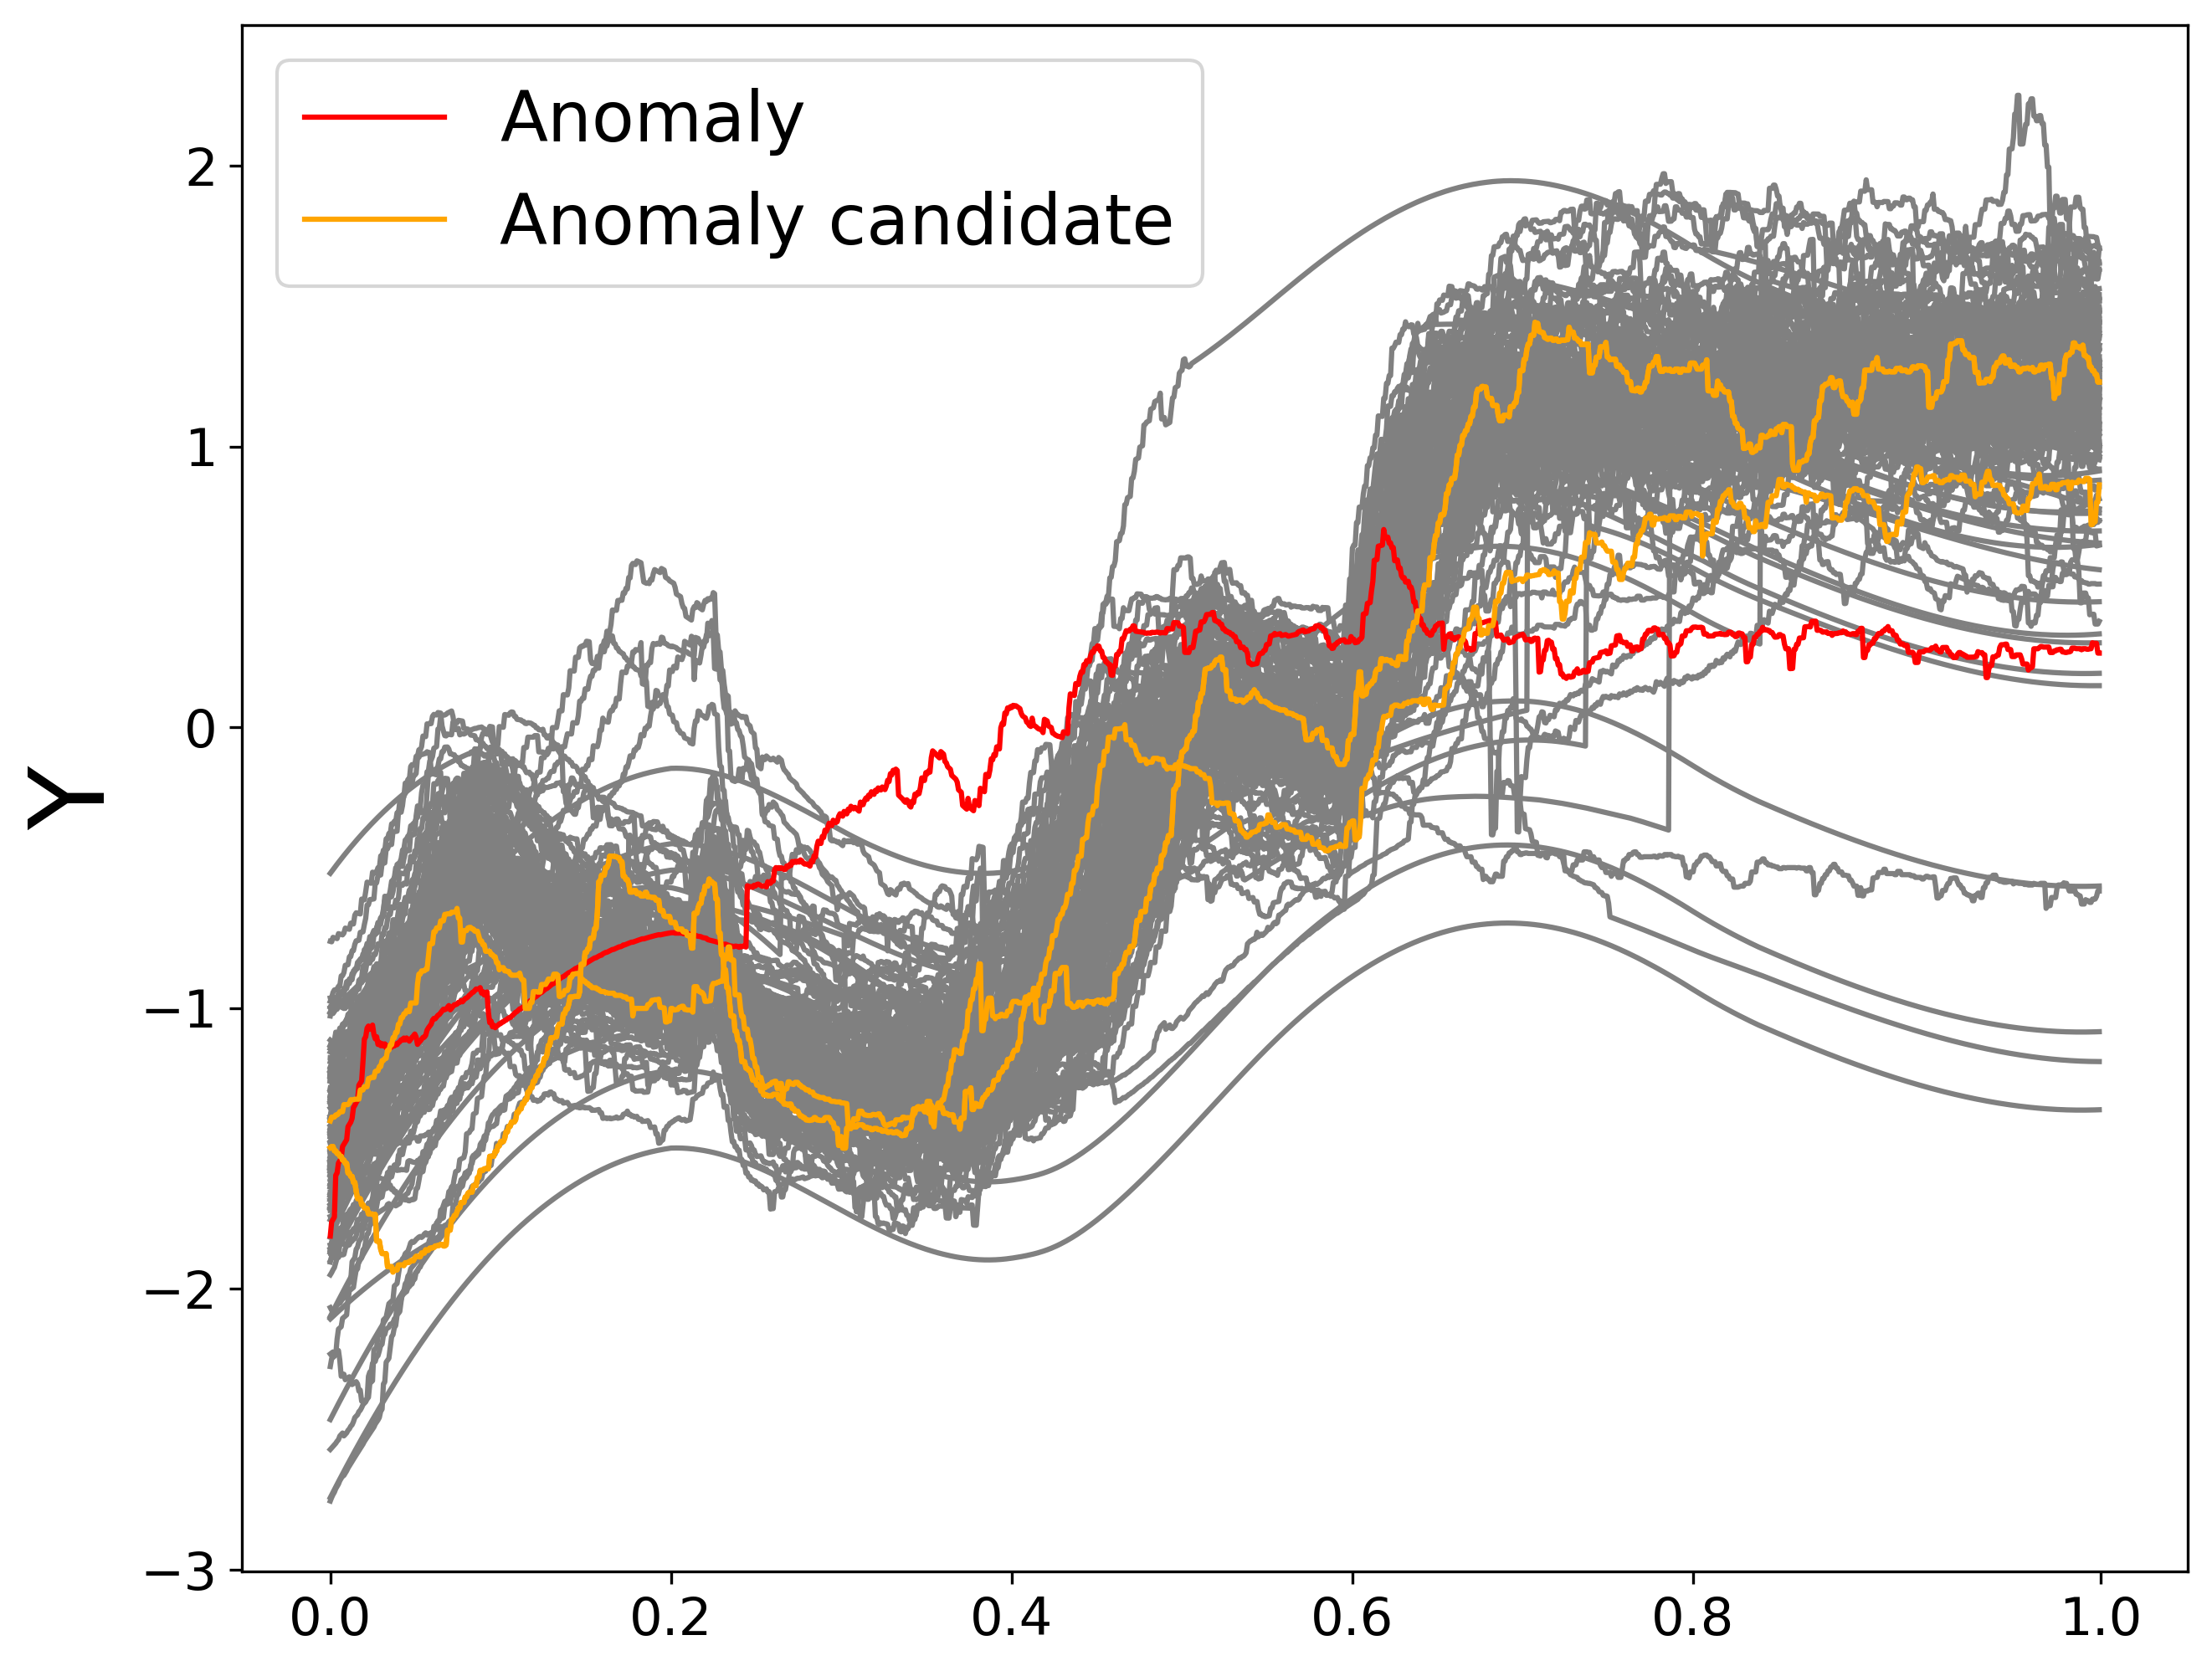

In [39]:
plt.figure(figsize=(10,8),dpi = 300)
for i in range(len(train_data_a)-1):
        plt.plot(train_data_a[i][2], color='gray')
plt.plot(train_data_a[-1][2],label='Anomaly', color='red')
my_label = 'Anomaly candidate'
for k,v in enumerate(pred.nonzero()[0]):
    if k == 0:
        plt.plot(test_data_a[v][2], label= my_label,color='orange')
        my_label = "_nolegend_"
    plt.plot(test_data_a[v][2], label= my_label,color='orange')
    
plt.xticks([0,250,500,750,1000, 1299], labels =['0.0','0.2','0.4','0.6','0.8','1.0'],fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20, loc='upper left')
plt.ylabel('Y', fontsize=30)